# Exploratory Data Analysis (EDA) for Fashion Product Images

This notebook provides a comprehensive EDA for the fashion product image dataset. We will explore the metadata, analyze class distributions, and examine image characteristics.

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import seaborn as sns
import os

# Import EDA utility functions
from src.eda_utils import (
    quote_product_display_name,
    merge_data,
    plot_class_distributions,
    plot_year_season_distribution,
    missing_values_summary,
    plot_dataset_histogram,
    show_sample_images
)

# Set plot style
sns.set(style='whitegrid')

## 1. Data Loading and Cleaning

We load the metadata from the CSV files. The `styles.csv` file may have product names with commas, so we use a cleaning function to ensure correct parsing.

In [2]:
# Clean up the dataset
quote_product_display_name('../fashion-dataset/styles.csv', '../fashion-dataset/styles_clean.csv')

# Define paths to the CSV files
images_csv = '../fashion-dataset/images.csv'
styles_csv = '../fashion-dataset/styles_clean.csv'

# Load datasets
styles_df = pd.read_csv(styles_csv)
images_df = pd.read_csv(images_csv)

print('Images CSV shape:', images_df.shape)
print('Styles CSV shape:', styles_df.shape)

Images CSV shape: (44446, 2)
Styles CSV shape: (44446, 10)


In [4]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
images_df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


We then merge the styles and images metadata into a single DataFrame for analysis.

In [6]:
df_merge = merge_data(styles_df, images_df)

print('Merged DataFrame shape:', df_merge.shape)

df_merge.head()

Merged DataFrame shape: (44446, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


## 2. Missing Values Analysis

Before proceeding, it's important to check for missing values. This helps us understand data quality and decide if we need to clean or impute any fields.

In [7]:
# Get a summary of missing values per column
missing_summary = missing_values_summary(df_merge)
print(missing_summary)

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
dtype: int64


The following variables have missing values: `baseColour` (15), `season` (21), `year` (1), `usage` (317), and `productDisplayName` (7).

These are relatively few records compared to the total dataset size, so we choose to drop them for simplicity and to ensure clean visualizations.

In [8]:
# Drop rows with any missing values
df = df_merge.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44099 entries, 0 to 44445
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44099 non-null  int64  
 1   gender              44099 non-null  object 
 2   masterCategory      44099 non-null  object 
 3   subCategory         44099 non-null  object 
 4   articleType         44099 non-null  object 
 5   baseColour          44099 non-null  object 
 6   season              44099 non-null  object 
 7   year                44099 non-null  float64
 8   usage               44099 non-null  object 
 9   productDisplayName  44099 non-null  object 
 10  filename            44099 non-null  object 
 11  link                44099 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.4+ MB


In [9]:
img_folder = '../fashion-dataset/images/'
image_paths = [os.path.join(img_folder, fname) for fname in images_df['filename']]

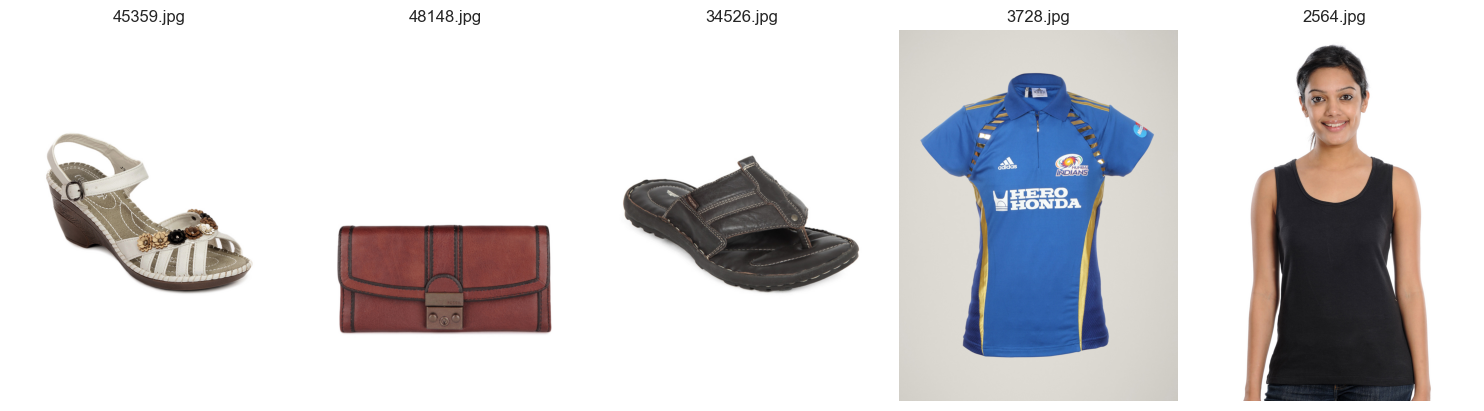

In [10]:
show_sample_images(image_paths, sample_size=5)

## 3. Class Distribution Analysis

Let's analyze the distribution of key categorical variables: gender, masterCategory, subCategory, and baseColour.

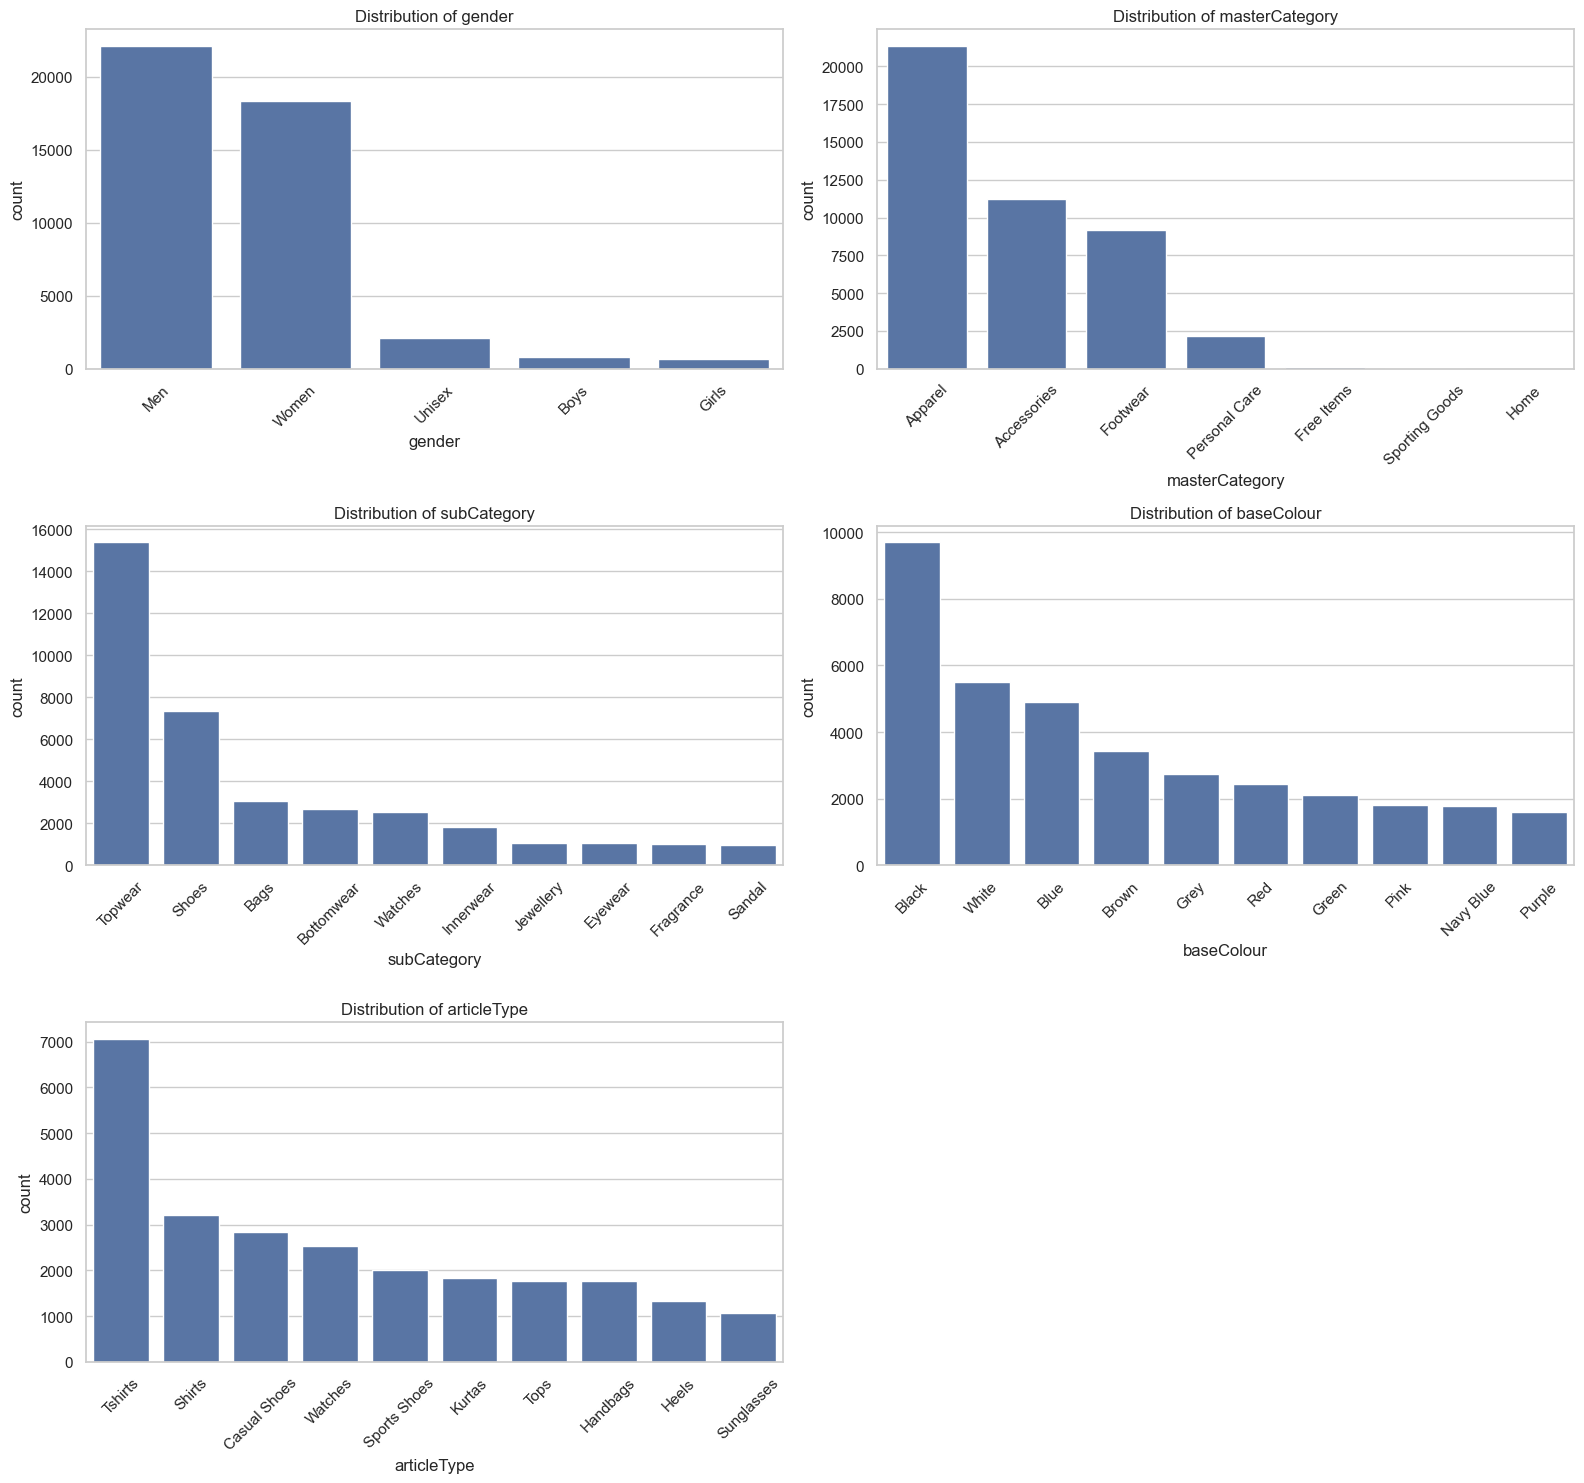

In [10]:
plot_class_distributions(df, ['gender', 'masterCategory', 'subCategory', 'baseColour', 'articleType'])

## 4. Year and Season Distribution

Now, let's see how products are distributed over years and seasons. This can reveal trends or seasonality in the data.

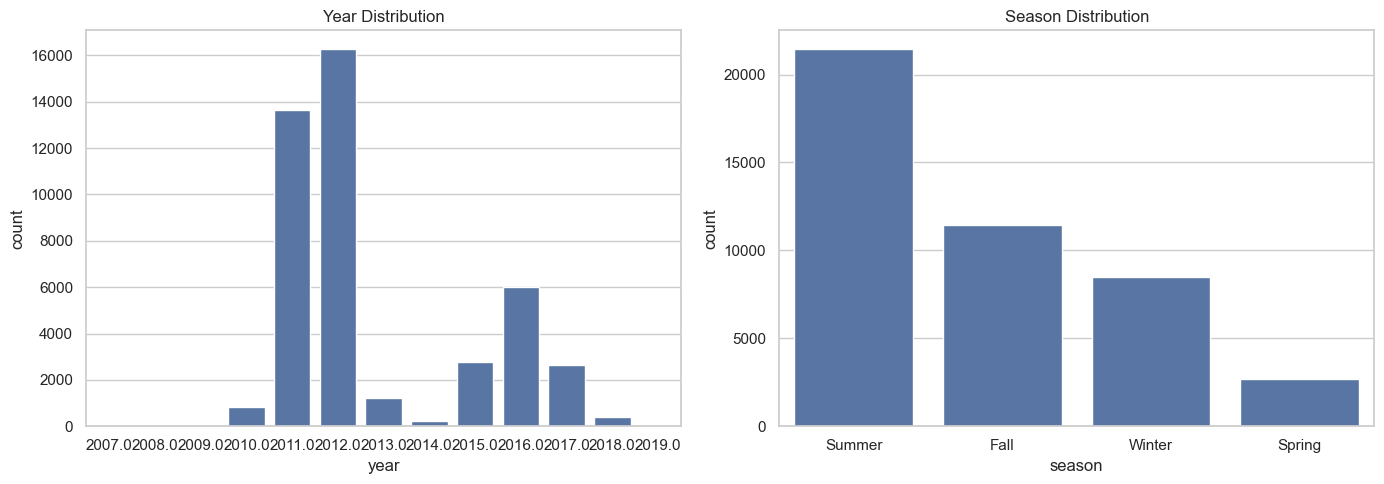

In [9]:
# Plot year and season distributions
plot_year_season_distribution(df)

In [14]:
from PIL import Image
import os

# Ruta a la carpeta de imágenes
img_folder = '../fashion-dataset/images/'

# Muestra aleatoria de imágenes para analizar
sample_files = images_df['filename'].sample(100, random_state=42)

sizes = []
modes = []

for fname in sample_files:
    try:
        with Image.open(os.path.join(img_folder, fname)) as img:
            sizes.append(img.size)
            modes.append(img.mode)
    except Exception as e:
        continue

# Análisis de tamaños
import pandas as pd
sizes_df = pd.DataFrame(sizes, columns=['width', 'height'])
print(sizes_df.describe())
print(pd.Series(modes).value_counts())

             width       height
count   100.000000   100.000000
mean   1432.800000  1910.400000
std     361.741244   482.321658
min    1080.000000  1440.000000
25%    1080.000000  1440.000000
50%    1080.000000  1440.000000
75%    1800.000000  2400.000000
max    1800.000000  2400.000000
RGB    100
Name: count, dtype: int64


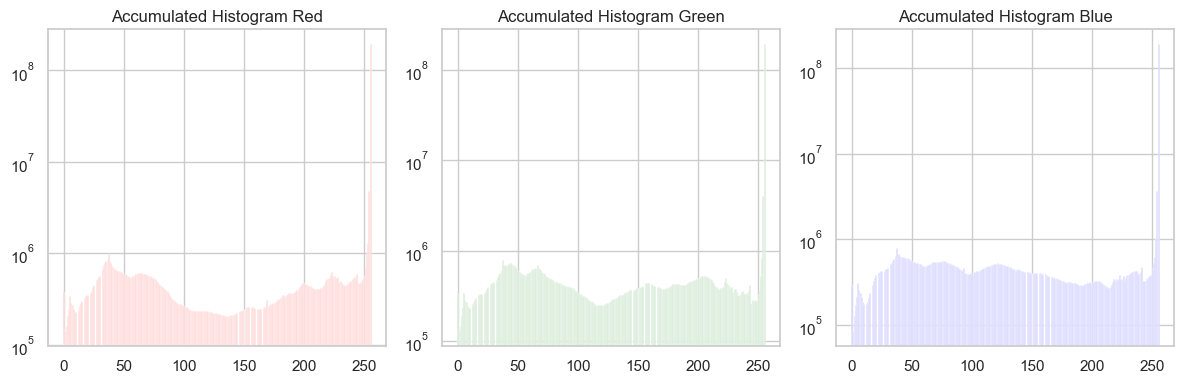

In [15]:
image_paths = [os.path.join(img_folder, fname) for fname in images_df['filename']]
plot_dataset_histogram(image_paths, sample_size=100)

The histograms show that most of the pixels in the images have high intensity values (close to 255) in all three channels, indicating a dominant presence of white or light backgrounds. However, there is also a variety of colors in the lower and middle values, reflecting the diversity of garments. For preprocessing, it is recommended to normalize the images and consider data augmentation or segmentation techniques to reduce the influence of the background on the model.

## 5. Next Steps

From here, you could:
- Explore relationships between variables (e.g., gender vs. category).
- Analyze image characteristics.
- Prepare data for machine learning or recommendation systems.

This notebook provides a solid foundation for understanding and working with the fashion product image dataset.